In [117]:
%pylab inline
import torch
import numpy
import sklearn.datasets
import torchvision.datasets

random.seed(0)
torch.manual_seed(0)

Populating the interactive namespace from numpy and matplotlib


In [118]:
# Fetching dataset
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)
# mnist = sklearn.datasets.fetch_mldata('MNIST original')

In [119]:
train_features = MNIST_train.train_data
train_labels = MNIST_train.train_labels
test_features = MNIST_test.test_data
test_labels = MNIST_test.test_labels

In [120]:
train_features.shape

torch.Size([60000, 28, 28])

tensor(5)


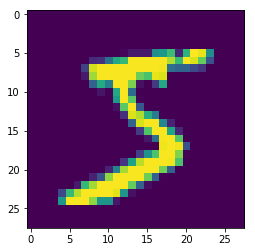

In [34]:
imshow(train_features[0, :, :].numpy())
print(train_labels[0])

tensor(0)


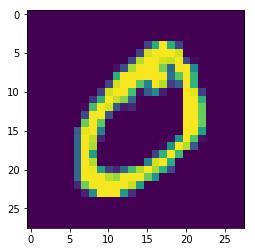

In [35]:
imshow(train_features[1, :, :].numpy())
print(train_labels[1])

In [16]:
train_features = train_features.numpy()
test_features = test_features.numpy()
train_labels = train_labels.numpy()
test_labels = test_labels.numpy()

train_features = train_features.reshape([-1, 28 * 28]).astype(float)
test_features = test_features.reshape([-1, 28 * 28]).astype(float)

In [17]:
# Всего 10 классов
class MnistNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MnistNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x

In [24]:
mnist_net = MnistNet(100)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=5.0e-4)

In [25]:
batch_size = 100
for epoch in range(20):
    order = random.permutation(train_features.shape[0])
    for start_index in range(0, train_features.shape[0], batch_size):
        optimizer.zero_grad()
        
        batch_indice = order[start_index:start_index+batch_size]
        batch_features = torch.FloatTensor(train_features[batch_indice, :])
        batch_labels = torch.LongTensor(train_labels[batch_indice])
        
        features_var = torch.autograd.Variable(batch_features)
        labels_var = torch.autograd.Variable(batch_labels)
        
        preds_var = mnist_net.forward(features_var)
        loss = criterion(preds_var, labels_var)
        
        loss.backward()
        
        optimizer.step()
        
    order = random.permutation(test_features.shape[0])
    
    all_preds = []
    all_trues = []
    for start_index in range(0, test_features.shape[0], batch_size):
        batch_indice = order[start_index:start_index+batch_size]
        batch_features = torch.FloatTensor(test_features[batch_indice, :])
        trues = test_labels[batch_indice]
        
        features_var = torch.autograd.Variable(batch_features)
        
        preds = mnist_net.forward(features_var).data.numpy().argmax(axis=1)
        
#         print preds.shape
#         print trues.shape
        
        all_preds.append(preds)
        all_trues.append(trues)
        
    all_preds = numpy.concatenate(all_preds)
    all_trues = numpy.concatenate(all_trues)
    
    print((all_preds == all_trues).sum() / float(all_trues.size))

0.9124
0.9226
0.9322
0.9337
0.9335
0.9389
0.9409
0.9413
0.9445
0.9472
0.9472
0.9477
0.9484
0.9464
0.9502
0.9503
0.9488
0.9517
0.9526
0.952


# Задание 1
Подобрать параметры Adam, при котором достигается наибольшая точность модели.

# Задание 2
Сделать обучение такой же модели для CIFAR-10. Модель изменить в зависимости от предпочтений, добавить оптимизатор по вкусу.

In [123]:
%pylab inline
import torch
import numpy
import sklearn.datasets
import torchvision.datasets

Populating the interactive namespace from numpy and matplotlib


In [124]:
CIFAR_train = torchvision.datasets.CIFAR10('./', download=True, train=True)
CIFAR_test = torchvision.datasets.CIFAR10('./', download=True, train=False)

Files already downloaded and verified
Files already downloaded and verified


In [125]:
train_features = CIFAR_train.train_data
train_labels = CIFAR_train.train_labels
test_features = CIFAR_test.test_data
test_labels = CIFAR_test.test_labels

In [126]:
train_features.shape

(50000, 32, 32, 3)

6


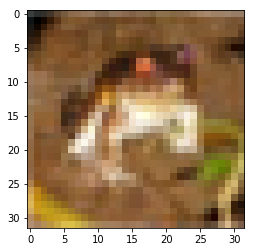

In [127]:
imshow(train_features[0, :, :, :])
print(train_labels[0])

9


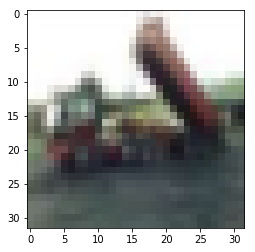

In [128]:
imshow(train_features[2, :, :, :])
print(train_labels[2])

In [146]:
#train_features = train_features.numpy()
#test_features = test_features.numpy()
train_labels = numpy.array(train_labels)#.numpy()
test_labels = numpy.array(test_labels)#.numpy()

train_features = train_features.reshape([-1, 3 * 32 * 32]).astype(float)
test_features = test_features.reshape([-1, 3 * 32 * 32]).astype(float)

In [148]:
# Всего 10 классов
class MnistNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MnistNet, self).__init__()
        self.fc1 = torch.nn.Linear(3 * 32 * 32, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x

In [151]:
mnist_net = MnistNet(1000)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=5.0e-4)

In [152]:
batch_size = 100
for epoch in range(20):
    order = random.permutation(train_features.shape[0])
    for start_index in range(0, train_features.shape[0], batch_size):
        optimizer.zero_grad()
        
        batch_indice = order[start_index:start_index+batch_size]
        batch_features = torch.FloatTensor(train_features[batch_indice, :])
        batch_labels = torch.LongTensor(train_labels[batch_indice])
        
        features_var = torch.autograd.Variable(batch_features)
        labels_var = torch.autograd.Variable(batch_labels)
        
        preds_var = mnist_net.forward(features_var)
        loss = criterion(preds_var, labels_var)
        
        loss.backward()
        
        optimizer.step()
        
    order = random.permutation(test_features.shape[0])
    
    all_preds = []
    all_trues = []
    for start_index in range(0, test_features.shape[0], batch_size):
        batch_indice = order[start_index:start_index+batch_size]
        batch_features = torch.FloatTensor(test_features[batch_indice, :])
        trues = test_labels[batch_indice]
        
        features_var = torch.autograd.Variable(batch_features)
        
        preds = mnist_net.forward(features_var).data.numpy().argmax(axis=1)
        
#         print preds.shape
#         print trues.shape
        
        all_preds.append(preds)
        all_trues.append(trues)
        
    all_preds = numpy.concatenate(all_preds)
    all_trues = numpy.concatenate(all_trues)
    
    print((all_preds == all_trues).sum() / float(all_trues.size))

0.1
0.1144
0.154
0.1294
0.1435
0.1038
0.139
0.1109
0.1486
0.1274
0.1378
0.137
0.1582
0.1553
0.148
0.1053
0.1484
0.1406
0.1603
0.1622
